# Цыпаев Владимир 
# РИМ-181228
# Метод главных компонент

### Алгоритм PCA

Дана матрица данных $D$ и коэффициент $\alpha$:
1. вычисляем среднее значение $\mu = \frac{1}{n} \sum \limits_{i=1}^{n} x_i$;
2. центруем матрицу данных $Z = D - 1 \cdot \mu^T$;
3. вычисляем матрицу ковариаций $K = \frac{1}{n} (Z^T Z)$;
4. вычисляем собственные значения $(\lambda_1, \lambda_2, \ldots, \lambda_d)$;
5. вычисляем собственные векторы $U = (u_1 u_2 \ldots u_d)$;
6. вычисляем долю общей дисперсии $f(r) = \frac{\sum_{i=1}^{r} \lambda_i} {\sum_{i=1}^{n} \lambda_i}$;
7. выбираем наименьший $r$ так, чтобы $f(r) \geq \alpha$;
8. выбираем $r$ первых векторов $U = (u_1 u_2 \ldots u_r)$;
9. уменьшаем признаковое пространство: $A = \{ a_i \: | \: a_i = U_r^T x_i, \: для \: i = 1, \ldots, n \} $

Реализуйте алгоритм для первых двух главных компонент. Найдите $\lambda_1$, $\lambda_2$ и $u_1$, $u_2$. Спроецируйте данные на плоскость образуемую этими векторами, визуализируйте полученные результаты c метками классов. Сравните реузльтаты с методом PCA из библиотеки sklearn.decomposition.

В качестве данных возьмите изображения с рукописными цифрами.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.datasets import load_iris
%matplotlib inline

data = load_iris()
x, y = data['data'], data['target']

In [2]:
def get_column(x, number_column):
    return x[:,number_column]

def get_mean_of_column(x, number_column):
    return x[:,number_column].mean()

def get_diff(x, number_column):
    return get_column(x,number_column)-get_mean_of_column(x, number_column)

def get_percent(L, r):
    return sum(L[:r])-sum(L)

def get_new_data(x, r):
    Z = (get_diff(x,0), get_diff(x,1), get_diff(x,2), get_diff(x,3))
    K = np.cov(Z)
    L, U = np.linalg.eig(K)
    Fr = get_percent(L, r)
    U = U[:,:r]
    list_value = [np.dot(U.transpose(), Z), L]
    
    return list_value

def get_pca_data(x, r):
    data = PCA(n_components=r, random_state=0)
    return data.fit_transform(x)

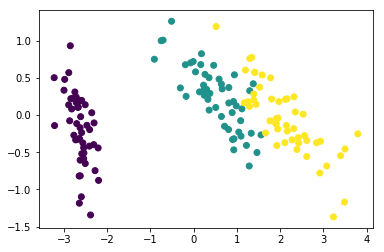

In [3]:
data = get_new_data(x, 2)
L = data[1]
data_new = data[0]
plt.scatter(data_new[0], data_new[1] ,c=y)

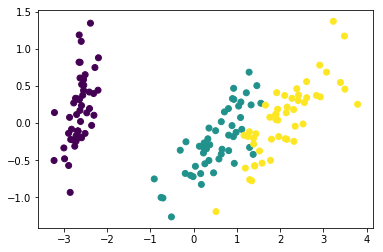

In [4]:
data = get_pca_data(x, 2)
plt.scatter(data[:,0], data[:,1], c=y)

На основе полученных собственных значений ковариационной матриы $K$ постройте график зависимости покрываемой дисперсии трансформированных данных от количества главных компонент.

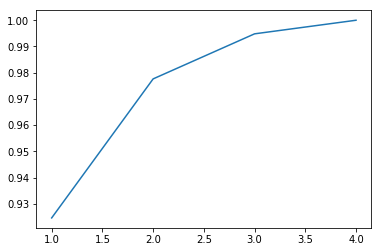

In [5]:
list_value = [sum(L[:i]) / sum(L) for i in range(1,5)]
plt.plot(range(1,5), list_value)

# Интерпретация компонент
## Корреляция с исходными признаками
Главные компоненты являются линейными кобинациями исходных признаков. В этой связи необходимо оценить связь каждой компоненты с исходными признаками.

Рассчет взаимосвязи будем проводить с помощью корреляции Пирсона:

\begin{equation}
r_{jk} = \frac{\sum_{i=1}^n (x_{ij} - \bar{x}_j) (x_{ik}' - \bar{x}_k')}{\sqrt{\sum_{i=1}^n (x_{ij} - \bar{x}_j)^2 \sum_{i=1}^n (x_{ik}' - \bar{x}_k')^2}}
\end{equation}

где
$\bar{x}_j$ - среднее значение $j$-го признака,
$\bar{x}_k'$ - среднее значение проекции на $k$-ю главную компоненту,
$n$ - количество объектов.

Отметим, что корреляция Пирсона изменяется от $-1$ до $+1$. Она равна $0$ в случае, когда величины независимы, и $\pm 1$, если они линейно зависимы.

Определите по коэффициентам корреляции, какие признаки в какую компоненту вошли.

In [6]:
for index in range(0,4):
    print('Корреляция измененных данных с исходными в столбце {}'.format(index))
    print(np.corrcoef(data_new[0], x[:,index])[0][1])
    print(np.corrcoef(data_new[1], x[:,index])[0][1])

Корреляция измененных данных с исходными в столбце 0
0.8975448849407615
-0.39023141074016654
Корреляция измененных данных с исходными в столбце 1
-0.3899933790475052
-0.8283125928832885
Корреляция измененных данных с исходными в столбце 2
0.9978540506354594
0.049030056338977966
Корреляция измененных данных с исходными в столбце 3
0.9664841831537923
0.04818016974007658
